In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [16]:
DATADIR = "E:\Egyetem\Data\error"
CATEGORIES = ['1','2','3']

IMG_SIZE = 100
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category) + 1
        num_of_pics_each = 0
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #fekete fehér képek beolvasása/színes képek beolvasása
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) #kép átméretezése
            training_data.append([new_array,class_num])
            num_of_pics_each+=1
        print(f"In [[{category}]] found {num_of_pics_each} pics") #kiírjuk hány kép volt minden kategóriában
            
create_training_data()

In [[1]] found 598 pics
In [[2]] found 579 pics
In [[3]] found 585 pics


In [17]:
import random

random.shuffle(training_data)

In [18]:
target = []
data = [] 

for features, label in training_data:
    data.append(features.flatten())  #a flatten szükséges a model betanításához mivel ez a model csak 1d-s tömböt fogad el
    target.append(label)

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,target, test_size=0.1)

In [20]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [21]:
model.score(X_test, Y_test) #pontosság

0.9152542372881356

In [22]:
# nézzük meg az eredményt a confusion mátrixban
Y_predicted = model.predict(X_test)

Text(69.0, 0.5, 'Truth')

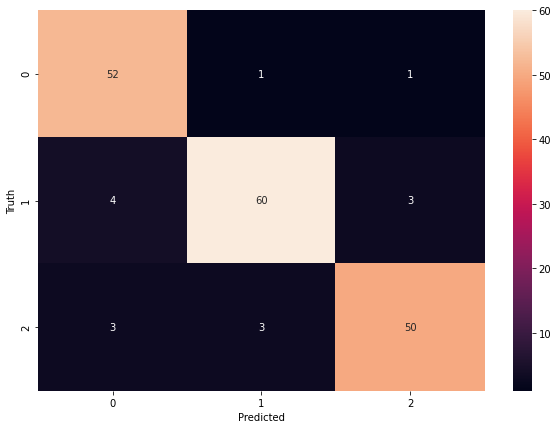

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predicted)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')